In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df= pd.read_csv('Myocardial infarction complications.csv')
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
pd.set_option('display.max_columns',123)
pd.set_option('display.max_rows',50)

In [4]:
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,...,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [6]:
df.shape

(1700, 124)

In [7]:
df.dtypes

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

In [8]:
df.isna().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

ID           1700
AGE            62
SEX             2
INF_ANAM        4
STENOK_AN       7
             ... 
DRESSLER        2
ZSN             2
REC_IM          2
P_IM_STEN       2
LET_IS          8
Length: 124, dtype: int64

In [11]:
df.duplicated().value_counts()

False    1700
dtype: int64

In [12]:
missing_percentages = df.isna().mean() * 100
result_df = pd.DataFrame({'column_name': missing_percentages.index, 
                          'Number of missing values': df.isna().sum(),
                          'percent_missing': missing_percentages.values})
print(result_df)

          column_name  Number of missing values  percent_missing
ID                 ID                         0         0.000000
AGE               AGE                         8         0.470588
SEX               SEX                         0         0.000000
INF_ANAM     INF_ANAM                         4         0.235294
STENOK_AN   STENOK_AN                       106         6.235294
...               ...                       ...              ...
DRESSLER     DRESSLER                         0         0.000000
ZSN               ZSN                         0         0.000000
REC_IM         REC_IM                         0         0.000000
P_IM_STEN   P_IM_STEN                         0         0.000000
LET_IS         LET_IS                         0         0.000000

[124 rows x 3 columns]


In [13]:
#Get the columns that have more than 30% missing values
cols_with_more_than_30percent_missing = result_df[result_df['percent_missing'] > 30]['column_name']

#Print the result
print(cols_with_more_than_30percent_missing)

IBS_NASL        IBS_NASL
S_AD_KBRIG    S_AD_KBRIG
D_AD_KBRIG    D_AD_KBRIG
KFK_BLOOD      KFK_BLOOD
NA_KB              NA_KB
NOT_NA_KB      NOT_NA_KB
LID_KB            LID_KB
Name: column_name, dtype: object


In [14]:
df.drop(columns=cols_with_more_than_30percent_missing, inplace=True)
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,NaN,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.

In [15]:
# Drop Columns of Myocardial Infraction Outcomes
columns_to_drop = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']
df = df.drop(columns_to_drop, axis=1)

In [16]:
# missing values per row (selected column threshold: 30%)
row_list = []
for i in range(df.shape[0]):
    n_miss = df.iloc[i].isnull().sum()
    perc = n_miss / df.shape[1] * 100
    # print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    if perc >= 30:
        row_list.append(i)

In [17]:
row_list

[145,
 167,
 370,
 493,
 516,
 549,
 650,
 725,
 763,
 802,
 944,
 1086,
 1127,
 1258,
 1285,
 1313,
 1509,
 1575,
 1577,
 1578,
 1588,
 1594,
 1618,
 1669]

In [18]:
df.drop(row_list, inplace=True)
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,NaN,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,130.0,1.05,0.52,12.8,6.0,2.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,N

In [19]:
# Create an instance of SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')
# Fill missing values in your DataFrame with the mode
x_filled = imputer.fit_transform(df)
# Convert the filled array back to a DataFrame
df = pd.DataFrame(x_filled, columns=df.columns)
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.15,0.15,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,5.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,6.9,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1696.0,77.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.7,0.0,130.0,1.05,0.52,12.8,6.0,2

In [20]:
# df=df.interpolate()

In [21]:
df.isna().sum()

ID           0
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
            ..
GEPAR_S_n    0
ASP_S_n      0
TIKL_S_n     0
TRENT_S_n    0
LET_IS       0
Length: 106, dtype: int64

In [22]:
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,847.807279,61.845465,0.625298,0.545346,2.176611,1.237470,1.181981,1.399165,0.034010,2.866945,0.188544,0.025060,0.002387,0.011337,0.020883,0.017303,0.000597,0.002387,0.001193,0.001790,0.006563,0.000597,0.003580,0.001193,0.001790,0.134845,0.025060,0.007757,0.079952,0.070406,0.022076,0.005370,0.013126,134.286993,82.631265,0.063246,0.023866,0.067422,0.004773,0.004177,0.008950,1.506563,0.869332,0.971360,0.251193,0.029236,0.692124,0.056086,0.013126,0.000597,0.210024,0.027446,0.034606,0.004773,0.121122,0.041169,0.041169,0.019093,0.002387,0.001193,0.001193,0.001193,0.019093,0.002983,0.001193,0.014916,0.060263,0.004177,0.005967,0.020286,0.016706,0.046539,0.007757,0.009547,0.039976,0.002387,0.004773,0.003580,0.001193,0.317422,4.151492,0.017900,136.429594,0.428144,0.245328,8.648502,12.438544,4.479117,0.313842,0.130072,0.069809,0.113962,0.486277,0.088305,0.053699,0.331742,0.106205,0.078759,0.284606,0.126492,0.674224,0.718974,0.752387,0.017900,0.202267,0.474344
std,490.337894,11.242058,0.484190,0.832745,2.429633,1.032455,0.801303,1.087228,0.181308,3.097744,0.649418,0.156353,0.048809,0.105899,0.143036,0.130437,0.024427,0.048809,0.034534,0.042283,0.080772,0.024427,0.059743,0.034534,0.042283,0.341660,0.156353,0.087755,0.271300,0.255906,0.146976,0.073105,0.113850,28.075303,16.192796,0.243477,0.152678,0.250827,0.068944,0.064511,0.094208,1.705291,0.866071,1.390506,0.689905,0.168518,0.461753,0.230156,0.113850,0.024427,0.407447,0.163429,0.182835,0.068944,0.326366,0.198741,0.198741,0.136893,0.048809,0.034534,0.034534,0.034534,0.136893,0.054554,0.034534,0.121255,0.238044,0.064511,0.077036,0.141020,0.128207,0.210713,0.087755,0.097268,0.195962,0.048809,0.068944,0.059743,0.034534,0.

In [23]:
df.corr()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
ID,1.000000,0.214299,-0.115756,0.093686,0.142178,0.178376,0.035109,0.034988,0.014143,0.025480,0.046352,-0.018782,0.017057,0.019783,0.055889,0.058840,0.012272,0.023069,0.017924,-0.006059,-0.012314,-0.000738,0.011355,-0.053259,0.039812,0.064529,0.047744,-0.004377,-0.121227,0.176862,0.088127,0.037220,-0.029279,-0.142838,-0.157124,0.131646,0.220896,0.130198,0.012460,0.025297,0.037543,0.045623,0.081595,0.037687,0.004859,0.076221,-0.160924,0.110279,0.092284,-0.039019,0.101571,-0.015400,0.015398,0.030314,-0.049293,0.019833,0.128876,0.045415,0.027359,0.030511,-0.021352,-0.032141,0.053838,0.032071,0.034600,0.088874,0.018728,0.000667,-0.005975,0.042328,-0.027442,0.078521,-0.048096,0.037929,0.085314,-0.033557,-0.041562,0.005954,0.030052,0.032199,-0.056310,-0.013809,-0.027061,-0.071605,-0.007636,0.161150,0.057318,-0.114828,0.116499,0.074767,0.093220,0.213269,0.151257,0.073634,0.104663,-0.034429,-0.028252,-0.017868,0.001710,-0.123264,-0.124895,0.072193,-0.144687,0.009793,0.005016,0.503339
AGE,0.214299,1.000000,-0.391888,0.095035,0.202569,0.205102,0.114795,0.235500,-0.024074,0.218757,0.120521,0.039566,0.047457,-0.022097,0.039878,0.105237,-0.021405,0.002849,0.011240,0.001838,0.020842,0.017729,0.015935,-0.019516,0.028213,0.135993,0.020885,0.026632,0.052794,0.083264,0.076498,0.016265,-0.027334,0.039458,-0.045171,0.086019,0.075541,0.133482,0.035614,0.036288,-0.030261,-0.030419,-0.077312,0.034318,-0.025859,0.014046,-0.121649,0.130026,0.035637,-0.008360,0.052708,0.001660,0.094968,0.030222,-0.021256,-0.029750,0.122559,0.086100,0.044193,-0.028742,-0.028742,0.012777,0.071747,-0.043053,0.040457,0.040671,0.017983,0.014885,0.056214,0.062231,-0.026374,0.004046,-0.038724,-0.047241,-0.168737,-0.021088,-0.061439,-0.063176,0.006626,-0.014461,-0.008818,-0.028575,0.024328,-0.107725,-0.059131,-0.000210,0.187235,-0.047664,0.015044,0.009447,0.038219,0.076271,-0.018898,0.010767,0.048183,0.020412,-0.002936,-0.006896,-0.031919,-0.157517,0.028957,-0.098359,-0.045034,-0.058206,-0.028497,0.156777
SEX,-0.115756,-0.391888,1.000000,0.042165,-0.077691,-0.112104,-0.085734,-0.253271,-0.065572,-0.291187,-0.097959,0.005816,-0.063185,-0.010254,-0.042114,-0.039075,0.018914,0.012601,-0.008947,-0.025542,0.017124,0.018914,-0.036154,-0.008947,-0.025542,-0.257378,-0.104590,-0.100165,0.028224,0.025126,-0.009531,-0.044320,0.013467,-0.088397,-0.034080,-0.082453,-0.032400,-0.076975,-0.000043,0.011906,0.008122,0.009488,0.004186,0.023955,0.013850,-0.004680,0.111228,-0.073813,0.035127,-0.031564,-0.103209,0.031961,0.004941,-0.017927,0.041802,0.023913,-0.100169,-0.027107,0.012601,0.026757,-0.008947,-0.044652,0.008921,-0.002859,-0.008947,-0.016600,-0.026703,-0.026321,-0.004049,-0.054736,0.004728,0.013030,0.054392,0.037969,0.107627,0.012601,0.035726,0.046400,0.026757,-0.038819,0.049943,0.002241,-0.049900,0.059225,0.054647,0.018874,-0.193154,0.018554,-0.036835,0.005085,-0.046476,-0.044346,0.008493,0.023098,-0.048325,-0.065952,-0.026338,-0.052195,0.103077,0.075786,-0.025215,0.034321,

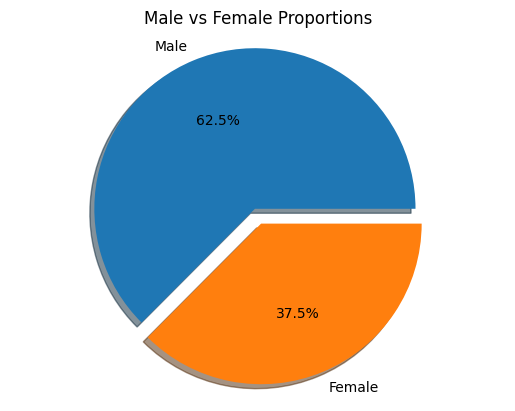

In [24]:
# Count the occurrences of each sex
sex_counts = df['SEX'].value_counts()
# Get the count of males and females
male_count = sex_counts[1]
female_count = sex_counts[0]
# Create a pie chart
sizes = [male_count, female_count]
labels = ['Male', 'Female']
explode = (0, 0.1)  # To highlight the 'Female' slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Male vs Female Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

0: female 635 37.35%                                                                                                            
1: male 1065 62.65%                                                                                                             
Gender (SEX): Males have a higher risk of heart attack than females.                                                            

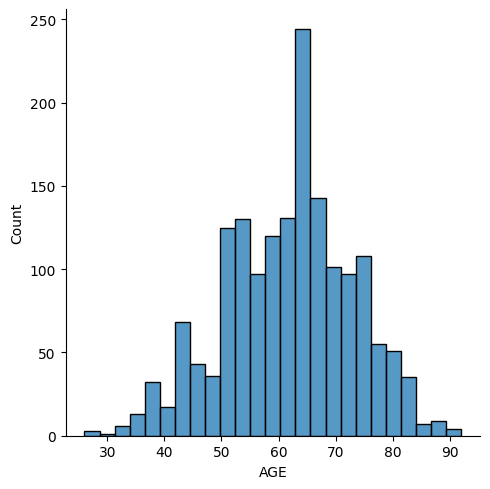

In [25]:
sns.displot(df['AGE'])

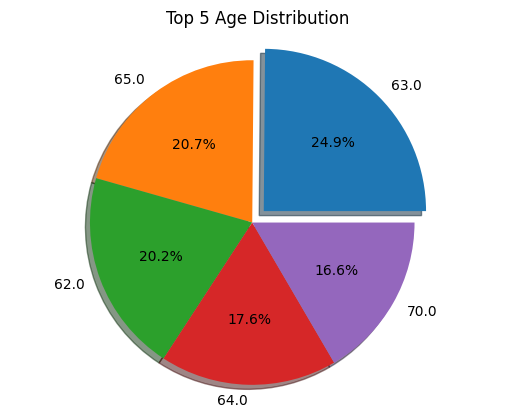

In [26]:
age_counts = df['AGE'].value_counts()
# Retrieve the top 5 most common age values
top_ages = age_counts.head(5)
# Create a pie chart
sizes = top_ages.values
labels = top_ages.index
explode = (0.1, 0, 0, 0, 0)  # To explode the first slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Top 5 Age Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Age (AGE): The risk of heart attack increases with age.

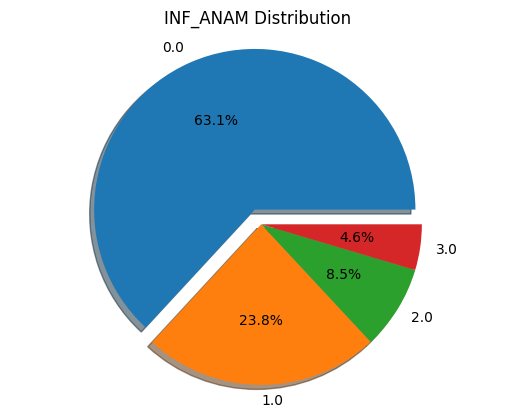

In [27]:
# Quantity of myocardial infarctions in the anamnesis (INF_ANAM)
inf_anam_counts = df['INF_ANAM'].value_counts()

# Calculate the percentage distribution
total_records = len(df)
percentage_distribution = (inf_anam_counts / total_records) * 100

# Create a pie chart
sizes = percentage_distribution.values
labels = percentage_distribution.index
explode = (0.1, 0, 0, 0)  # To explode the first slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('INF_ANAM Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Quantity of myocardial infarctions in the anamnesis (INF_ANAM): The more heart attacks a person has had in the past, the higher their risk of having another one.                                                                                               
4.7% people having higher risk to get another one.

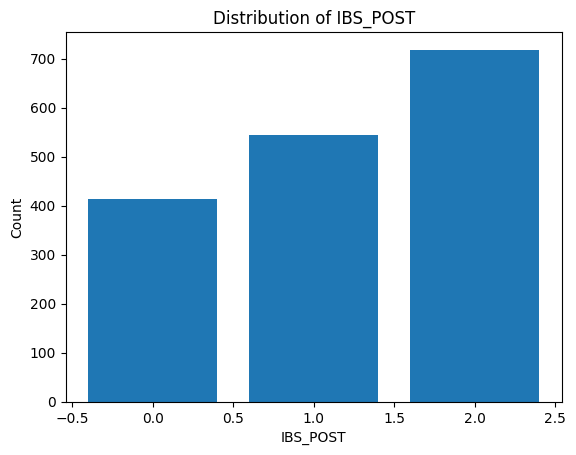

In [28]:
value_counts = df['IBS_POST'].value_counts()

# Get the unique values and their counts
values = value_counts.index
counts = value_counts.values

# Create the bar plot
plt.bar(values, counts)

# Set labels and title
plt.xlabel('IBS_POST')
plt.ylabel('Count')
plt.title('Distribution of IBS_POST')

# Display the plot
plt.show()

Coronary heart disease (CHD) in recent weeks, days before admission to hospital (IBS_POST): Having CHD, especially unstable angina pectoris, in the weeks or days before hospital admission increases the risk of heart attack.

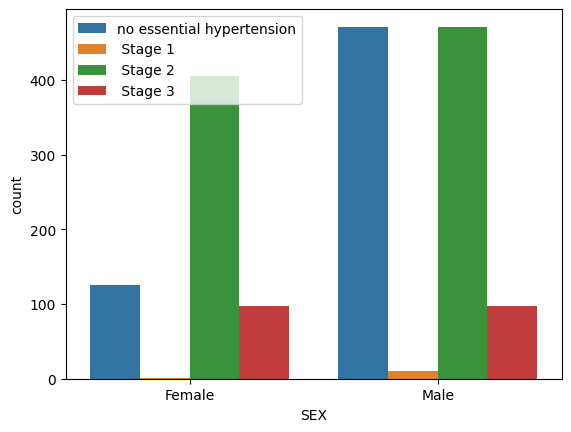

In [29]:
sns.countplot(x='SEX',hue='GB',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['no essential hypertension',' Stage 1', ' Stage 2', ' Stage 3'])
plt.show()

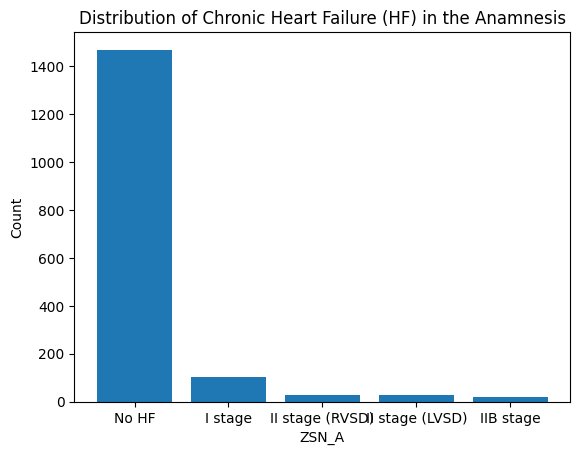

In [30]:
# Define the categories and their respective counts
categories = ['No HF', 'I stage', 'II stage (RVSD)', 'II stage (LVSD)', 'IIB stage']
counts = [1468, 103, 27, 29, 19]

# Create the bar plot
plt.bar(categories, counts)

# Set labels and title
plt.xlabel('ZSN_A')
plt.ylabel('Count')
plt.title('Distribution of Chronic Heart Failure (HF) in the Anamnesis')

# Display the plot
plt.show()

Having chronic heart failure indicates a higher risk of heart attack.

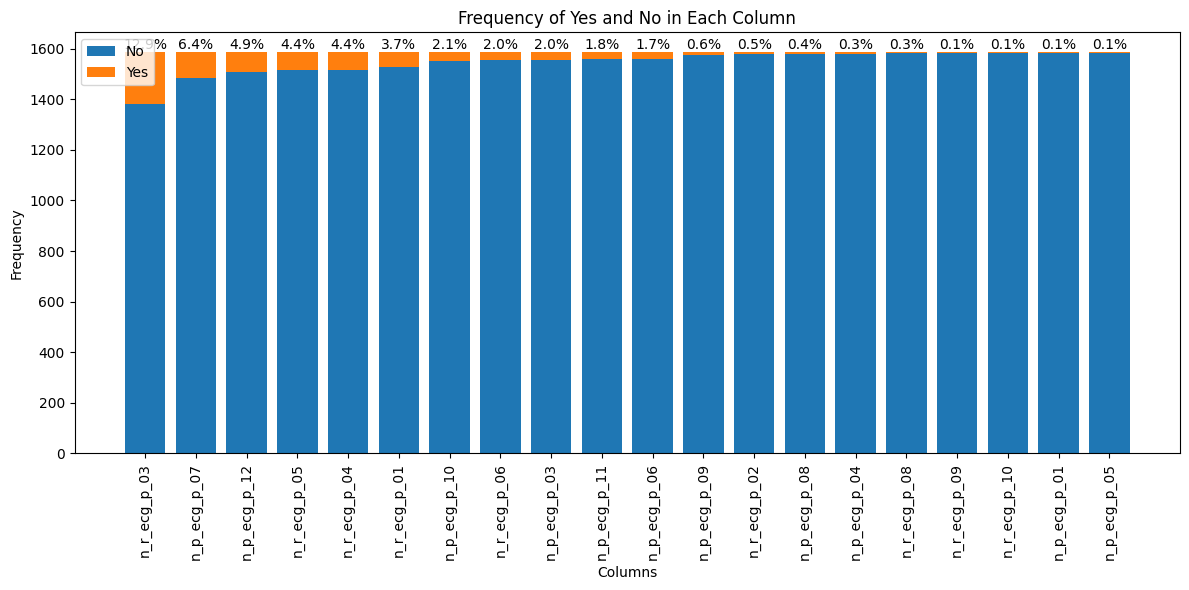

In [31]:
# Create a dictionary with the column names and their frequencies
data = {
    'n_r_ecg_p_01': [1527, 58],
    'n_r_ecg_p_02': [1577, 8],
    'n_r_ecg_p_03': [1381, 204],
    'n_r_ecg_p_04': [1516, 69],
    'n_r_ecg_p_05': [1515, 70],
    'n_r_ecg_p_06': [1553, 32],
    'n_r_ecg_p_08': [1581, 4],
    'n_r_ecg_p_09': [1583, 2],
    'n_r_ecg_p_10': [1583, 2],
    'n_p_ecg_p_01': [1583, 2],
    'n_p_ecg_p_03': [1553, 32],
    'n_p_ecg_p_04': [1580, 5],
    'n_p_ecg_p_05': [1583, 2],
    'n_p_ecg_p_06': [1558, 27],
    'n_p_ecg_p_07': [1483, 102],
    'n_p_ecg_p_08': [1578, 7],
    'n_p_ecg_p_09': [1575, 10],
    'n_p_ecg_p_10': [1551, 34],
    'n_p_ecg_p_11': [1557, 28],
    'n_p_ecg_p_12': [1507, 78]
}

# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data, index=['No', 'Yes'])

# Transpose the DataFrame
data_df = data_df.T

# Calculate the total frequency for each category
data_df['Total'] = data_df['No'] + data_df['Yes']

# Calculate the percentage for each value (Yes) within each category
data_df['Percentage'] = (data_df['Yes'] / data_df['Total']) * 100

# Sort the DataFrame by percentage in descending order
data_df = data_df.sort_values(by='Percentage', ascending=False)

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(data_df.index, data_df['No'], label='No')
plt.bar(data_df.index, data_df['Yes'], bottom=data_df['No'], label='Yes')

# Add data labels on top of the bars
for i, (_, row) in enumerate(data_df.iterrows()):
    plt.text(i, row['Total'], f"{row['Percentage']:.1f}%", ha='center', va='bottom')

# Add title and axis labels
plt.title('Frequency of Yes and No in Each Column')
plt.xlabel('Columns')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

ECG rhythms, which may indicate underlying heart conditions or abnormalities that could increase the risk of a heart attack.

<AxesSubplot: >

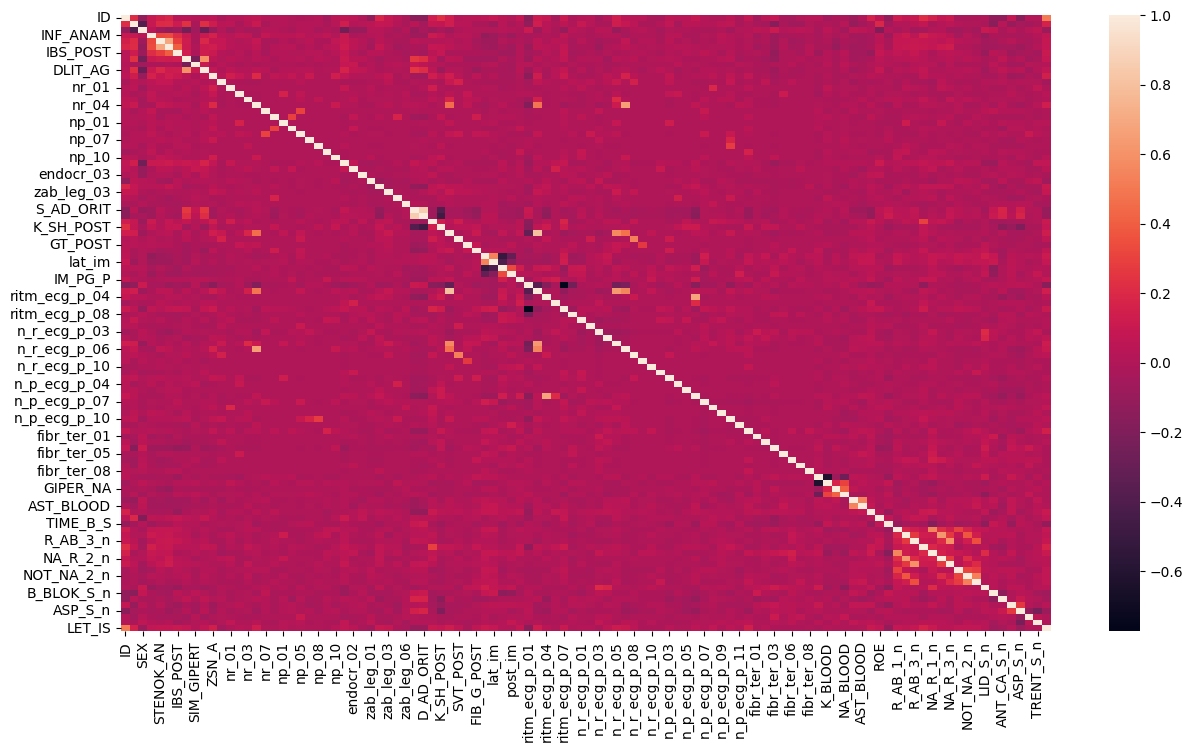

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

In [33]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [34]:
x = df.iloc[:,:-1]
y = df['LET_IS']

# Train-Test Split

In [35]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)

# Smote Technique: Balanced Dataset

In [36]:
#Apply SMOTE to the training set

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')
x_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

In [37]:
x_train_resampled.shape, y_train_resampled.shape

((9032, 104), (9032,))

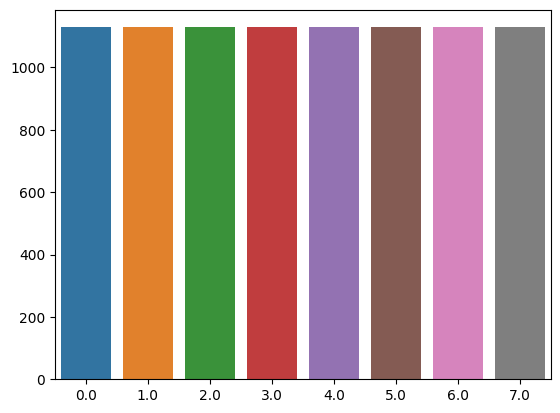

In [38]:
# Assuming y_train_resampled contains three unique values: 0, 1, and 2
value_counts = y_train_resampled.value_counts()
# Plotting the count
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.show()


# StandardScaler()

In [39]:
# Perform feature scaling on the resampled training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_resampled)

# PCA

In [40]:
# Apply PCA for dimensional reduction on the scaled training data
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

In [41]:
# Create a dataframe of PCA results for the training data
pca_columns = [f'pc{i+1}' for i in range(X_train_pca.shape[1])]
pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60,pc61,pc62,pc63,pc64,pc65,pc66,pc67,pc68,pc69,pc70,pc71,pc72,pc73,pc74,pc75,pc76,pc77,pc78,pc79
0,-0.444155,1.638712,0.560193,-2.368369,1.875171,0.095328,-0.180408,1.396283,0.743199,-1.241081,-0.612107,-0.556958,-0.350309,0.766711,0.569131,0.123789,0.248948,0.745695,0.358134,0.436697,0.675195,0.543686,0.429336,-0.315164,-0.838642,0.618551,-0.484548,0.083171,1.180288,0.311595,-0.395761,-0.601988,-0.069977,-0.093989,-0.008476,-0.146127,-0.223295,-0.446770,-0.023085,-0.324034,-0.099523,-0.012719,-0.161107,0.068819,0.043785,0.507466,-0.118879,-0.370978,0.239009,1.203508,-0.013274,-0.303156,-0.083663,-0.078837,-0.521914,0.616368,0.482891,-0.260950,0.172737,-0.113901,0.503861,0.415764,0.092262,0.124802,0.243804,0.516360,-0.329661,-0.611171,0.992617,-0.852712,0.599518,-1.353864,-0.721453,0.217279,-0.234073,-0.766993,0.068057,0.521088,-0.306825
1,-0.829121,-1.720652,0.323033,-0.360437,-1.581265,-1.671264,-0.247654,-2.203589,1.513072,0.885534,-1.710217,-1.224017,-0.798997,-0.923061,1.386463,0.696876,-1.101367,-0.682765,-0.460747,-0.933973,-0.236720,-1.376222,-0.418251,0.332620,-0.606286,-0.020032,0.261125,-0.364524,0.242297,-0.480250,0.219839,-0.265983,-0.303363,-0.632224,0.193654,-0.090112,-0.340505,-0.247310,0.177520,-0.030723,0.190170,0.237224,0.164928,0.021575,0.017033,0.516171,0.590914,0.116522,0.522261,0.673122,-0.336270,-0.131235,0.854903,-0.104850,0.478918,0.174465,-0.283163,0.904135,-0.296467,-0.148050,0.617416,-1.066765,0.422265,0.883675,-0.091457,1.270688,-0.801019,-0.219503,0.473703,-1.830010,0.295784,0.322780,1.919937,-0.085697,-0.184149,-0.105348,0.411138,-0.688057,1.280657
2,0.212009,-0.723661,-0.415284,0.001306,0.941196,-1.456499,1.336115,-1.883540,1.335131,-0.347450,-1.206544,-0.351223,-1.265204,1.046856,-0.095019,-0.096159,-0.752411,-0.345183,-0.287882,-0.521014,-0.123606,-1.118130,0.630333,-0.130777,-0.833815,-0.101557,1.015715,0.419321,-0.372696,-0.062439,-0.578628,-1.203920,0.409640,-1.498896,-0.281698,0.355387,-0.037248,0.152958,0.147232,0.232971,0.395268,0.379470,0.101658,-0.411014,-0.246240,0.340147,0.442025,-0.327401,-0.197485,0.511848,0.000261,0.113614,0.460133,1.024213,0.334967,-0.638522,0.177656,-1.619332,-0.736341,-0.196229,-0.153204,-0.019345,1.378278,-1.948908,-0.331569,1.698714,-1.386617,-0.328186,-0.862253,-1.057723,-0.141918,0.779149,-0.783883,-0.579158,-0.051406,0.806605,0.794048,-0.797647,-0.666263
3,0.084079,0.686960,1.787163,-1.547338,0.585810,-0.083065,-1.285591,0.951045,-0.078455,0.326141,0.033279,-0.543598,-0.241119,1.839542,-0.475945,0.300594,-1.166489,-1.014623,1.473250,1.254586,-0.030311,-0.432511,-0.558246,0.312982,-0.382893,-0.826529,-0.665095,0.271342,-0.392128,-0.035883,-0.312470,-1.161433,-0.751603,1.133056,0.331771,-0.431941,-0.333502,-0.018742,0.166121,0.300693,0.353598,-0.012087,-0.054744,0.487902,0.331241,0.014593,-0.639782,0.407722,-0.265924,0.753054,-0.264649,0.485996,0.391400,0.915039,-0.644807,0.251097,-0.007145,-0.208479,0.325879,-0.629138,0.508982,-0.114887,-1.115649,0.001037,0.312070,-0.207990,-0.445600,-0.865211,-1.324599,-1.139911,-0.303238,1.408755,-0.849490,-0.266851,0.092651,-0.559322,0.935778,0.536008,-0.680608
4,0.475643,0.421674,-1.190504,-1.008087,2.191000,0.166973,-0.089886,1.572432,0.312140,-0.301270,-0.606221,-1.745614,-0.230314,0.939762,0.500707,1.322169,-0.941780,-1.233310,-0.409741,1.041617,-0.282321,-1.318753,0.444743,-0.091502,-0.918681,-1.118733,0.358961,0.108010,-0.330165,1.384734,-0.274766,0.352504,-0.643998,0.672209,-0.105936,-0.247700,-0.134982,-0.346191,0.204683,-0.170221,0.123850,0.126052,-0.432128,0.141088,0.420113,0.387541,-0.218456,-0.583866,-0.649514,0.834971,0.196349,-0.397794,0.076491,-0.346379,-0.317482,-0.056076,0.805141,0.028519,-0.501034,0.177486,-0.957425,-

In [42]:
#Cumulative sum
np.cumsum(pca.explained_variance_ratio_) 

array([0.04459443, 0.08419316, 0.11973992, 0.15231238, 0.18072196,
       0.2085186 , 0.23260531, 0.25555852, 0.27725756, 0.29825277,
       0.31892718, 0.33775015, 0.35563373, 0.37286694, 0.38965218,
       0.405484  , 0.42089412, 0.43541893, 0.44977238, 0.4638414 ,
       0.47756261, 0.49049726, 0.50300621, 0.51540043, 0.52744558,
       0.53926913, 0.55078922, 0.56223872, 0.57361277, 0.58468972,
       0.59554867, 0.60620366, 0.61654528, 0.62671211, 0.63664876,
       0.64654903, 0.65635675, 0.66615297, 0.67591323, 0.68561635,
       0.69530911, 0.70493735, 0.71450604, 0.72404806, 0.73354923,
       0.74290511, 0.75224511, 0.76137925, 0.77044559, 0.77933049,
       0.78807836, 0.79676847, 0.8051893 , 0.81327843, 0.82132183,
       0.82923132, 0.83684922, 0.84413297, 0.85119654, 0.85809779,
       0.86479579, 0.87139298, 0.87783148, 0.88386767, 0.8898734 ,
       0.8956959 , 0.90126369, 0.90663179, 0.91180328, 0.91673764,
       0.9213301 , 0.92582763, 0.93021471, 0.93440692, 0.93845

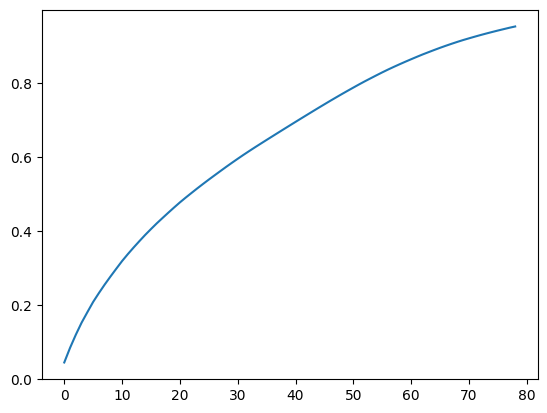

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Lasso Regularization

In [44]:
# Apply Lasso regularization on the PCA dataframe
lasso = Lasso(alpha=0.1)  # Adjust the regularization parameter alpha as per your needs
lasso.fit(pca_df, y_train_resampled)

Lasso(alpha=0.1)

In [45]:
# Filter the PCA components based on non-zero coefficients from Lasso regularization
selected_features = lasso.coef_ != 0
pca_df_selected = pca_df.loc[:, selected_features]

In [46]:
# Create a dataframe with the selected PCA components and target column
final_df = pd.concat([pca_df_selected, pd.Series(y_train_resampled, name='LET_IS')], axis=1)

In [47]:
# Replace the column names in final_df with the original dataset feature names
original_feature_names = [x.columns[i] for i, is_selected in enumerate(selected_features) if is_selected]
final_df.columns = list(original_feature_names) + ['LET_IS']

In [48]:
# Print the selected features
print("Selected Features:", list(original_feature_names))
# Display the final dataframe with the selected PCA components and target column
print("Final Dataset:")
final_df

Selected Features: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'endocr_01', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_p_ecg_p_03', 'n_p_ecg_p_07', 'n_p_ecg_p_11', 'fibr_ter_03', 'fibr_ter_06']
Final Dataset:


,AGE,SEX,INF_ANAM,STENOK_AN,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_01,nr_02,nr_03,nr_04,nr_07,np_01,np_04,np_05,np_07,np_08,endocr_01,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,post_im,IM_PG_P,ritm_ecg_p_01,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_08,n_r_ecg_p_09,n_p_ecg_p_03,n_p_ecg_p_07,n_p_ecg_p_11,fibr_ter_03,fibr_ter_06,LET_IS
0,-0.444155,1.638712,0.560193,-2.368369,0.095328,-0.180408,1.396283,0.743199,-1.241081,-0.556958,-0.350309,0.766711,0.569131,0.123789,0.745695,0.358134,0.436697,0.675195,0.543686,-0.838642,-0.484548,0.083171,1.180288,0.311595,-0.395761,-0.069977,-0.093989,-0.008476,-0.146127,-0.223295,-0.446770,0.068819,0.043785,0.507466,-0.521914,0.616368,-0.260950,0.172737,0.415764,0.516360,-0.852712,0.217279,-0.766993,0.0
1,-0.829121,-1.720652,0.323033,-0.360437,-1.671264,-0.247654,-2.203589,1.513072,0.885534,-1.224017,-0.798997,-0.923061,1.386463,0.696876,-0.682765,-0.460747,-0.933973,-0.236720,-1.376222,-0.606286,0.261125,-0.364524,0.242297,-0.480250,0.219839,-0.303363,-0.632224,0.193654,-0.090112,-0.340505,-0.247310,0.021575,0.017033,0.516171,0.478918,0.174465,0.904135,-0.296467,-1.066765,1.270688,-1.830010,-0.085697,-0.105348,3.0
2,0.212009,-0.723661,-0.415284,0.001306,-1.456499,1.336115,-1.883540,1.335131,-0.347450,-0.351223,-1.265204,1.046856,-0.095019,-0.096159,-0.345183,-0.287882,-0.521014,-0.123606,-1.118130,-0.833815,1.015715,0.419321,-0.372696,-0.062439,-0.578628,0.409640,-1.498896,-0.281698,0.355387,-0.037248,0.152958,-0.411014,-0.246240,0.340147,0.334967,-0.638522,-1.619332,-0.736341,-0.019345,1.698714,-1.057723,-0.579158,0.806605,0.0
3,0.084079,0.686960,1.787163,-1.547338,-0.083065,-1.285591,0.951045,-0.078455,0.326141,-0.543598,-0.241119,1.839542,-0.475945,0.300594,-1.014623,1.473250,1.254586,-0.030311,-0.432511,-0.382893,-0.665095,0.271342,-0.392128,-0.035883,-0.312470,-0.751603,1.133056,0.331771,-0.431941,-0.333502,-0.018742,0.487902,0.331241,0.014593,-0.644807,0.251097,-0.208479,0.325879,-0.114887,-0.207990,-1.139911,-0.266851,-0.559322,0.0
4,0.475643,0.421674,-1.190504,-1.008087,0.166973,-0.089886,1.572432,0.312140,-0.301270,-1.745614,-0.230314,0.939762,0.500707,1.322169,-1.233310,-0.409741,1.041617,-0.282321,-1.318753,-0.918681,0.358961,0.108010,-0.330165,1.384734,-0.274766,-0.643998,0.672209,-0.105936,-0.247700,-0.134982,-0.346191,0.141088,0.420113,0.387541,-0.317482,-0.056076,0.028519,-0.501034,-0.140636,1.195108,-0.330874,-1.156040,-0.102040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,-2.829482,-0.425459,-0.015076,1.832731,1.643984,-0.049808,3.174421,-0.962357,-1.523429,-1.474754,2.165268,-1.032938,-2.708711,-0.828575,0.744912,-0.469624,-1.020796,1.402119,-0.072149,2.210833,-0.831774,-0.963724,0.245406,0.250314,-1.452331,-0.340787,0.033742,-0.569560,-0.522268,-0.388176,-0.059458,-0.189558,-0.353569,-0.032400,1.043603,0.046589,-0.325684,1.256263,0.093276,1.102573,-0.253763,-0.433540,0.408165,7.0
9028,-1.637325,2.327322,1.575254,-0.895516,0.651921,-1.571469,0.462150,1.718779,-0.310539,-0.195631,0.090145,1.443161,-1.206817,-0.291643,-0.057358,0.669547,-0.525710,-0.100629,-0.394051,0.655968,0.561865,0.712873,-0.763247,0.177240,-0.050814,0.565417,-0.674518,-0.893545,0.292787,0.486473,-0.215575,-0.601037,-0.602039,0.101786,1.303561,-0.445518,0.568130,0.755828,1.618781,-1.398227,0.809629,-0.451594,0.074618,7.0
9029,-3.021609,0.543546,4.749255,6.162757,-0.323045,0.285072,-0.223092,0.722025,0.155319,1.128754,-1.585529,-1.008429,1.070235,1.292460,0.069579,-1.114487,0.680347,0.687539,0.374647,-0.188442,0.359929,0.052441,0.502510,0.234516,-0.483465,0.035691,0.527446,-0.331082,-0.471768,-0.052772,-0.073585,0.040293,0.129638,0.078939,-0.358261,1.206872,0.001089,-0.184186,-0.141032,0.615011,-0.586420,0.299742,-0.467383,7.0
9030,-0.082766,0.782741,0.537965,-1.782383,1.936205,-2.336307,3.642728,-2.43

In [49]:
x = final_df.iloc[:,:-1]
y = final_df['LET_IS']

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Logistic Regression

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       232
         1.0       0.83      0.75      0.79       216
         2.0       0.92      1.00      0.96       217
         3.0       0.83      0.81      0.82       230
         4.0       0.96      1.00      0.98       238
         5.0       0.96      1.00      0.98       218
         6.0       0.86      0.94      0.90       232
         7.0       0.92      0.96      0.94       224

    accuracy                           0.89      1807
   macro avg       0.88      0.89      0.88      1807
weighted avg       0.88      0.89      0.88      1807



In [53]:
print("Accuracy Score:", accuracy_score(ytest, ypred))

Accuracy Score: 0.8865522966242391


In [54]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, ypred))

Confusion Matrix:
[[150  14  10  23   4   9  16   6]
 [  8 161   5  15   4   0  14   9]
 [  0   0 217   0   0   0   0   0]
 [ 16  13   3 186   3   1   4   4]
 [  0   0   0   0 238   0   0   0]
 [  0   0   0   0   0 218   0   0]
 [ 13   1   0   0   0   0 218   0]
 [  4   4   0   0   0   0   2 214]]


In [55]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = lg.predict(xtrain)
y_test_pred = lg.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.884152249134948
Testing Accuracy: 0.8865522966242391


In [56]:
y_pred=lg.predict(x)
y_pred

array([0., 3., 0., ..., 7., 6., 7.])

In [57]:
ypred_df = pd.DataFrame({'actual': y, 'predicted': y_pred})
ypred_df

,actual,predicted
0,0.0,0.0
1,3.0,3.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9027,7.0,7.0
9028,7.0,7.0
9029,7.0,7.0
9030,7.0,6.0


# HistGradientBoostingClassifier

In [58]:
# HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
# Fit the model on the data
hgbc.fit(xtrain, ytrain)
ypred = hgbc.predict(xtest)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       232
         1.0       0.96      1.00      0.98       216
         2.0       1.00      1.00      1.00       217
         3.0       0.98      1.00      0.99       230
         4.0       1.00      1.00      1.00       238
         5.0       1.00      1.00      1.00       218
         6.0       1.00      1.00      1.00       232
         7.0       0.99      1.00      1.00       224

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



In [60]:
print("Accuracy Score:", accuracy_score(ytest, ypred))

Accuracy Score: 0.991698948533481


In [61]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = hgbc.predict(xtrain)
y_test_pred = hgbc.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.991698948533481


# XGBClassifier

In [62]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
xgb_model = XGBClassifier()
kfold = KFold(n_splits=10)
xgb_model.fit(xtrain, ytrain)
ypred = xgb_model.predict(xtest)
ypred

array([2, 1, 1, ..., 6, 0, 1], dtype=int64)

In [63]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.96      0.99      0.98       216
         2.0       1.00      1.00      1.00       217
         3.0       0.97      0.99      0.98       230
         4.0       1.00      1.00      1.00       238
         5.0       1.00      1.00      1.00       218
         6.0       0.99      1.00      0.99       232
         7.0       0.99      1.00      0.99       224

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.98      1807
weighted avg       0.99      0.99      0.98      1807



In [64]:
a1 = accuracy_score(ytest, ypred)
a1

0.9850581073602657

In [65]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = xgb_model.predict(xtrain)
y_test_pred = xgb_model.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9850581073602657


# KNN

In [66]:
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10)

In [67]:
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred

array([2., 1., 1., ..., 6., 3., 1.])

In [68]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81       232
         1.0       0.92      0.99      0.96       216
         2.0       0.97      1.00      0.99       217
         3.0       0.93      1.00      0.97       230
         4.0       0.97      1.00      0.98       238
         5.0       0.98      1.00      0.99       218
         6.0       0.96      1.00      0.98       232
         7.0       0.94      1.00      0.97       224

    accuracy                           0.96      1807
   macro avg       0.96      0.96      0.95      1807
weighted avg       0.96      0.96      0.95      1807



In [69]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = knn.predict(xtrain)
y_test_pred = knn.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9652595155709343
Testing Accuracy: 0.957387935805202


# Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
kfold = KFold(n_splits=10)
rfc = RandomForestClassifier()

In [72]:
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
ypred

array([2., 1., 1., ..., 6., 0., 1.])

In [73]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       232
         1.0       0.98      0.98      0.98       216
         2.0       1.00      1.00      1.00       217
         3.0       0.99      1.00      0.99       230
         4.0       1.00      1.00      1.00       238
         5.0       1.00      1.00      1.00       218
         6.0       1.00      1.00      1.00       232
         7.0       0.98      1.00      0.99       224

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



In [74]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = rfc.predict(xtrain)
y_test_pred = rfc.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9905921416712784


# SVM Model

In [75]:
from sklearn.svm import SVC

In [76]:
svm = SVC()
kfold = KFold(n_splits=10)

svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)
ypred

array([2., 1., 1., ..., 6., 0., 1.])

In [77]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       232
         1.0       0.97      0.99      0.98       216
         2.0       1.00      1.00      1.00       217
         3.0       0.97      1.00      0.98       230
         4.0       1.00      1.00      1.00       238
         5.0       1.00      1.00      1.00       218
         6.0       0.99      1.00      1.00       232
         7.0       1.00      1.00      1.00       224

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



In [78]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = svm.predict(xtrain)
y_test_pred = svm.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9929411764705882
Testing Accuracy: 0.987825124515772


# Naive Bayes Model

In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [80]:
mms = MinMaxScaler()

xtr = mms.fit_transform(xtrain)
xte = mms.fit_transform(xtest)

### Multinonial NB

In [81]:
nb_mul = MultinomialNB()
kfold = KFold(n_splits=10)

nb_mul.fit(xtr, ytrain)
ypred = nb_mul.predict(xte)
ypred

array([2., 1., 1., ..., 6., 5., 1.])

In [82]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.50      0.68      0.57       232
         1.0       0.57      0.67      0.62       216
         2.0       0.77      0.83      0.80       217
         3.0       0.66      0.61      0.63       230
         4.0       0.91      0.47      0.62       238
         5.0       0.66      0.85      0.74       218
         6.0       0.50      0.48      0.49       232
         7.0       0.84      0.58      0.69       224

    accuracy                           0.64      1807
   macro avg       0.67      0.65      0.65      1807
weighted avg       0.68      0.64      0.64      1807



In [83]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = nb_mul.predict(xtrain)
y_test_pred = nb_mul.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6788927335640138
Testing Accuracy: 0.6712783619258439


### Gaussian NB

In [84]:
nb_gau = GaussianNB()
kfold = KFold

nb_gau.fit(xtr, ytrain)
ypred = nb_gau.predict(xte)
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.13      1.00      0.23       232
         1.0       0.00      0.00      0.00       216
         2.0       0.00      0.00      0.00       217
         3.0       0.00      0.00      0.00       230
         4.0       0.00      0.00      0.00       238
         5.0       0.00      0.00      0.00       218
         6.0       0.00      0.00      0.00       232
         7.0       0.00      0.00      0.00       224

    accuracy                           0.13      1807
   macro avg       0.02      0.12      0.03      1807
weighted avg       0.02      0.13      0.03      1807



In [86]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = nb_gau.predict(xtrain)
y_test_pred = nb_gau.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.12705882352941175
Testing Accuracy: 0.13004980630879912


# Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ypred

array([2., 1., 1., ..., 6., 1., 1.])

In [89]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.57      0.65       232
         1.0       0.84      0.88      0.86       216
         2.0       0.97      0.97      0.97       217
         3.0       0.84      0.89      0.86       230
         4.0       0.96      0.95      0.95       238
         5.0       0.97      1.00      0.98       218
         6.0       0.88      0.99      0.93       232
         7.0       0.93      0.93      0.93       224

    accuracy                           0.90      1807
   macro avg       0.89      0.90      0.89      1807
weighted avg       0.89      0.90      0.89      1807



### Hyperparameter tuning

In [90]:
params = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [4,5,6,7,8,9]
    }

In [91]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [92]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9]})

In [93]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

#### Improved Dicision tree

In [94]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9)

dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ypred

array([2., 0., 1., ..., 6., 5., 1.])

In [95]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61       232
         1.0       0.82      0.78      0.80       216
         2.0       0.93      0.94      0.93       217
         3.0       0.78      0.89      0.83       230
         4.0       0.92      0.95      0.93       238
         5.0       0.92      0.99      0.95       218
         6.0       0.91      0.90      0.90       232
         7.0       0.92      0.94      0.93       224

    accuracy                           0.86      1807
   macro avg       0.86      0.87      0.86      1807
weighted avg       0.86      0.86      0.86      1807



In [96]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = dt.predict(xtrain)
y_test_pred = dt.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9348096885813149
Testing Accuracy: 0.8649695628112894


# ANN Model

In [97]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [98]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.1))
ann.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.1))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#Fit the data 
ann.fit(xtrain, ytrain, epochs=50, batch_size=10)

Epoch 1/50
723/723 [==============================] - 4s 3ms/step - loss: -98.5050 - accuracy: 0.1264
Epoch 2/50
723/723 [==============================] - 2s 3ms/step - loss: -1213.9897 - accuracy: 0.1264
Epoch 3/50
723/723 [==============================] - 2s 3ms/step - loss: -4471.5898 - accuracy: 0.1264
Epoch 4/50
723/723 [==============================] - 2s 3ms/step - loss: -10515.1074 - accuracy: 0.1264
Epoch 5/50
723/723 [==============================] - 2s 3ms/step - loss: -19878.6992 - accuracy: 0.1264
Epoch 6/50
723/723 [==============================] - 2s 3ms/step - loss: -32526.5586 - accuracy: 0.1264
Epoch 7/50
723/723 [==============================] - 2s 3ms/step - loss: -48646.5781 - accuracy: 0.1264
Epoch 8/50
723/723 [==============================] - 2s 3ms/step - loss: -68662.6172 - accuracy: 0.1264
Epoch 9/50
723/723 [==============================] - 2s 3ms/step - loss: -93585.3359 - accuracy: 0.1264
Epoch 10/50
723/723 [==============================] - 2s 3m

In [99]:
ypred = ann.predict(xtest)
ypred

57/57 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [100]:
ypred = np.argmax(ypred, axis=-1)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.13      1.00      0.23       232
         1.0       0.00      0.00      0.00       216
         2.0       0.00      0.00      0.00       217
         3.0       0.00      0.00      0.00       230
         4.0       0.00      0.00      0.00       238
         5.0       0.00      0.00      0.00       218
         6.0       0.00      0.00      0.00       232
         7.0       0.00      0.00      0.00       224

    accuracy                           0.13      1807
   macro avg       0.02      0.12      0.03      1807
weighted avg       0.02      0.13      0.03      1807



In [102]:
# Assuming you have already trained your model and obtained predictions
y_train_pred = ann.predict(xtrain)
y_test_pred = ann.predict(xtest)

# Calculating accuracy scores
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

57/57 [==============================] - 0s 3ms/step
Training Accuracy: 0.12636678200692042
Testing Accuracy: 0.11953514111787493
